# Medical Cost Personal Cost Prediction


### Content
Columns

1. age: age of primary beneficiary

2. sex: insurance contractor gender, female, male

3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
4. objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

5. children: Number of children covered by health insurance / Number of dependents

6. smoker: Smoking

7. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

8. charges: Individual medical costs billed by health insurance

Data Link:  https://www.kaggle.com/mirichoi0218/insurance 

The main goal of this notebook is to predict insurance cost accurately and compare the other machine learning regression algorithm with **Impact Learning**.

This data has been analysed and modeled by **Md. Mahmudul Hasan Riyad**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

C:\Users\Riyad\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("F:\\datasets\\Medical Cost Personal Datasets\\insurance.csv")

## Exploring Data

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0, 0.5, 'Cost')

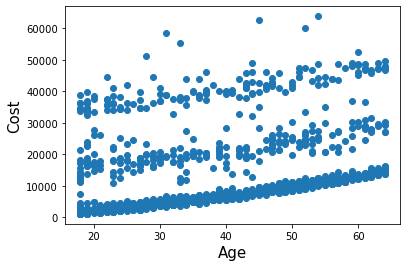

In [9]:
plt.scatter(data['age'], data['charges'])
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Cost', fontsize = 15)

Text(0, 0.5, 'Cost')

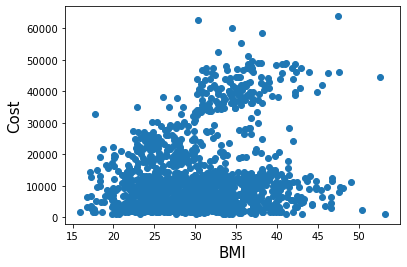

In [10]:
plt.scatter(data['bmi'], data['charges'])
plt.xlabel('BMI', fontsize = 15)
plt.ylabel('Cost', fontsize = 15)

([<matplotlib.axis.XTick at 0x2330ba814c8>,
 <a list of 10 Text xticklabel objects>)

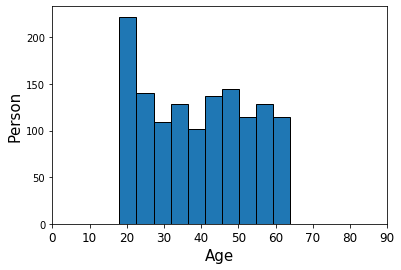

In [11]:
plt.figure(figsize = (6,4))
plt.hist(data['age'],bins = 10, histtype = 'bar', ec = 'black')
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Person", fontsize = 15)
plt.xticks(np.arange(0,100,10), fontsize = 12)

## Preprocessing

In [12]:
# Scaling data
scalar = StandardScaler()
data.loc[:,['age', 'bmi', 'children', 'charges']] = scalar.fit_transform(data.loc[:,['age', 'bmi', 'children', 'charges']])

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,female,-0.453320,-0.908614,yes,southwest,0.298584
1,-1.509965,male,0.509621,-0.078767,no,southeast,-0.953689
2,-0.797954,male,0.383307,1.580926,no,southeast,-0.728675
3,-0.441948,male,-1.305531,-0.908614,no,northwest,0.719843
4,-0.513149,male,-0.292556,-0.908614,no,northwest,-0.776802


In [14]:
# Spliting data into dependent and independent features
X = data.drop('charges', axis = 1)
y = data['charges']

In [15]:
# Encoding the categorical data with OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer((OneHotEncoder(), ['sex', 'smoker', 'region']),
                                 remainder = 'passthrough')
X = preprocessor.fit_transform(X)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits= 10, shuffle = False, random_state = 42)

In [18]:
# Useful functions
def display_rmse_score(mse):
    rmse = np.sqrt(mse)
    print("Mean Squared Error = ", mse.mean())
    print("Root Mean Squared Error = ", rmse.mean())
    print("RMSE Standard Deviation = ", rmse.std() )
def display_mae_score(mae):
    print("Mean Absolute Error = ", mae.mean())
    print("MAE Standard Deviation = ", mae.std())

## Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_scores_mse = -cross_val_score(lin_reg, X_train, y_train, scoring = "neg_mean_squared_error",cv = folds)
lin_scores_mae = -cross_val_score(lin_reg, X_train, y_train, scoring = "neg_mean_absolute_error",cv = folds)

In [20]:
display_rmse_score(lin_scores_mse)
display_mae_score(lin_scores_mae)

Mean Squared Error =  0.26198606042100014
Root Mean Squared Error =  0.50973107688826
RMSE Standard Deviation =  0.04647891646042093
Mean Absolute Error =  0.34802638826789495
MAE Standard Deviation =  0.033359319328286306


## Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = True)
X_poly = poly_features.fit_transform(X_train)

In [22]:
plin_reg = LinearRegression()
plin_scores_mse = -cross_val_score(plin_reg, X_poly, y_train, scoring = "neg_mean_squared_error",cv = folds)
plin_scores_mae = -cross_val_score(plin_reg, X_poly, y_train, scoring = "neg_mean_absolute_error",cv = folds)

In [23]:
display_rmse_score(plin_scores_mse)
display_mae_score(plin_scores_mae)

Mean Squared Error =  0.1680002336179515
Root Mean Squared Error =  0.40722184427592784
RMSE Standard Deviation =  0.04658973237166575
Mean Absolute Error =  0.25101400818378694
MAE Standard Deviation =  0.026313722760378286


## Support Vector Regression

In [24]:
from sklearn.svm import SVR
svr_reg = SVR(C = 2.0, epsilon = 0.2, gamma='scale')
svr_scores_mse = -cross_val_score(svr_reg, X_train, y_train, scoring = "neg_mean_squared_error",cv = folds)
svr_scores_mae = -cross_val_score(svr_reg, X_train, y_train, scoring = "neg_mean_absolute_error",cv = folds)

In [25]:
display_rmse_score(svr_scores_mse)
display_mae_score(svr_scores_mae)

Mean Squared Error =  0.164536437336028
Root Mean Squared Error =  0.4038341905853874
RMSE Standard Deviation =  0.03813638486108816
Mean Absolute Error =  0.2806969355862488
MAE Standard Deviation =  0.02195155631206212


## Decision Tree Regressor

In [26]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(min_samples_leaf =1, random_state = 42)
tree_scores_mse = -cross_val_score(tree_reg, X_train, y_train, scoring = "neg_mean_squared_error",cv = folds)
tree_scores_mae = -cross_val_score(tree_reg, X_train, y_train, scoring = "neg_mean_absolute_error",cv = folds)

In [27]:
display_rmse_score(tree_scores_mse)
display_mae_score(tree_scores_mae)

Mean Squared Error =  0.2950358066032953
Root Mean Squared Error =  0.5409371242910301
RMSE Standard Deviation =  0.04922229339482142
Mean Absolute Error =  0.257858715403504
MAE Standard Deviation =  0.03643147255148946


## Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
rnd_scores_mse = -cross_val_score(rnd_reg, X_train, y_train, scoring = "neg_mean_squared_error",cv = folds)
rnd_scores_mae = -cross_val_score(rnd_reg, X_train, y_train, scoring = "neg_mean_absolute_error",cv = folds)

In [29]:
display_rmse_score(rnd_scores_mse)
display_mae_score(rnd_scores_mae)

Mean Squared Error =  0.16937838268968877
Root Mean Squared Error =  0.40940250992674204
RMSE Standard Deviation =  0.04204720627310008
Mean Absolute Error =  0.23314283019548204
MAE Standard Deviation =  0.015517600999903337


## Impact Learning Regressor

In [30]:
from ImpactLearning import Regressor
il_reg = Regressor()
il_reg.fit(X_train,y_train, X_test, y_test, loss_function="MAE", optimizer = "GD",)
il_reg.train(epochs= 4000, lr=0.03, progress_per=200)

Epoch: 200, train_loss: 0.564188, test_loss: 0.567080 
Epoch: 400, train_loss: 0.414457, test_loss: 0.404431 
Epoch: 600, train_loss: 0.326519, test_loss: 0.312311 
Epoch: 800, train_loss: 0.308303, test_loss: 0.294709 
Epoch: 1000, train_loss: 0.305985, test_loss: 0.292779 
Epoch: 1200, train_loss: 0.304470, test_loss: 0.290831 
Epoch: 1400, train_loss: 0.302938, test_loss: 0.288660 
Epoch: 1600, train_loss: 0.301493, test_loss: 0.286488 
Epoch: 1800, train_loss: 0.300007, test_loss: 0.284092 
Epoch: 2000, train_loss: 0.298394, test_loss: 0.281502 
Epoch: 2200, train_loss: 0.296628, test_loss: 0.278695 
Epoch: 2400, train_loss: 0.294684, test_loss: 0.275595 
Epoch: 2600, train_loss: 0.293014, test_loss: 0.272582 
Epoch: 2800, train_loss: 0.291515, test_loss: 0.269507 
Epoch: 3000, train_loss: 0.290114, test_loss: 0.266680 
Epoch: 3200, train_loss: 0.288750, test_loss: 0.264382 
Epoch: 3400, train_loss: 0.287259, test_loss: 0.261825 
Epoch: 3600, train_loss: 0.286648, test_loss: 0.2611

In [31]:
from ImpactLearning import Regressor
il_reg = Regressor()
il_reg.fit(X_train,y_train, X_test, y_test, loss_function="MSE", optimizer = "GD",)
il_reg.train(epochs=4000, lr=0.03, progress_per=200)

Epoch: 200, train_loss: 0.478514, test_loss: 0.477124 
Epoch: 400, train_loss: 0.288345, test_loss: 0.264694 
Epoch: 600, train_loss: 0.258590, test_loss: 0.230860 
Epoch: 800, train_loss: 0.255242, test_loss: 0.228216 
Epoch: 1000, train_loss: 0.254584, test_loss: 0.228418 
Epoch: 1200, train_loss: 0.254429, test_loss: 0.228771 
Epoch: 1400, train_loss: 0.254393, test_loss: 0.229001 
Epoch: 1600, train_loss: 0.254384, test_loss: 0.229128 
Epoch: 1800, train_loss: 0.254382, test_loss: 0.229195 
Epoch: 2000, train_loss: 0.254381, test_loss: 0.229229 
Epoch: 2200, train_loss: 0.254381, test_loss: 0.229246 
Epoch: 2400, train_loss: 0.254381, test_loss: 0.229255 
Epoch: 2600, train_loss: 0.254381, test_loss: 0.229259 
Epoch: 2800, train_loss: 0.254381, test_loss: 0.229261 
Epoch: 3000, train_loss: 0.254381, test_loss: 0.229262 
Epoch: 3200, train_loss: 0.254381, test_loss: 0.229263 
Epoch: 3400, train_loss: 0.254381, test_loss: 0.229263 
Epoch: 3600, train_loss: 0.254381, test_loss: 0.2292